## Error Analysis and Visualisation for XGBoost Models

### Check running python kernel

In [1]:
!which python

/home/smose_roshni/miniconda3/envs/ml-fuel-test/bin/python


### Imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import glob
import os
from sklearn.metrics import r2_score

### Top Level Constants

In [3]:
drop_columns = ['lon', 'lat', 'APE']
HIGH_THRESHOLD = 1e10
result_dir = '../../data/midlats/results'
model_type = 'midlats'

### Inference Files

In [4]:
FILE_PATHS = os.path.join(result_dir, '*'+model_type+'*.csv')
FILE_NAMES = glob.glob(FILE_PATHS)
print(FILE_NAMES)

['../../data/midlats/results/midlats_output_Aug.csv', '../../data/midlats/results/midlats_output_Sept.csv', '../../data/midlats/results/midlats_output_July.csv', '../../data/midlats/results/midlats_output_Dec.csv', '../../data/midlats/results/midlats_output_Nov.csv', '../../data/midlats/results/midlats_output_Oct.csv']


### Make Dataframe

In [5]:
fli_df = pd.concat((pd.read_csv(f, index_col=False).reset_index(drop=True) for f in FILE_NAMES), ignore_index=True)

In [6]:
fli_df

,lat,lon,actual_load,predicted_load,APE
0,-39.625,-63.625,5.652058e+07,3.786772e+07,33.001888
1,-39.375,-63.625,4.336088e+07,5.408561e+07,24.733638
2,-36.375,-66.625,1.465659e+08,2.457857e+07,83.230368
3,-36.375,-66.375,1.959883e+08,3.106803e+07,84.148017
4,-36.125,-66.625,1.827170e+08,2.640114e+07,85.550806
...,...,...,...,...,...
3190,55.875,71.125,8.630253e+07,1.342783e+08,55.590261
3191,55.875,89.625,2.828085e+08,2.306699e+08,18.435997
3192,55.875,89.875,1.255755e+08,2.278652e+08,81.456684
3193,55.875,90.875,1.813989e+08,2.613539e+08,44.076881


### Stats

In [7]:
actual_mean = fli_df['actual_load'].mean()
actual_median = fli_df['actual_load'].median()
print("Actual Fuel Load mean - {actual_mean} and median - {actual_median}".format(actual_mean = actual_mean, actual_median = actual_median))

Actual Fuel Load mean - 1305540849.2961788 and median - 281319932.2625427


In [8]:
Predicted_mean = fli_df['predicted_load'].mean()
Predicted_median = fli_df['predicted_load'].median()
print("Predicted Fuel Load mean - {Predicted_mean} and median - {Predicted_median}".format(Predicted_mean = Predicted_mean, Predicted_median = Predicted_median))

Predicted Fuel Load mean - 1249399749.4219403 and median - 237309817.19714203


### $R^2$ Score 
More details [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [9]:
r2_score(fli_df['actual_load'], fli_df['predicted_load'])

0.3605898121651582

### General Trend of Actual and Predicted Values

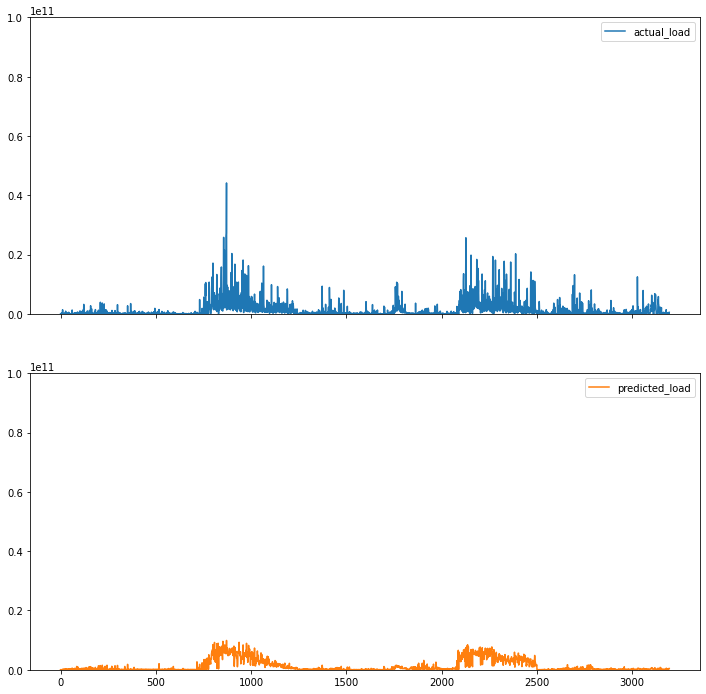

In [10]:
axes = fli_df.drop(columns=drop_columns).plot(subplots = True, figsize=(12, 12))
for ax in axes:
    ax.set_ylim(0, 1e11)

### Distribution of high values (> HIGH_THRESHOLD)

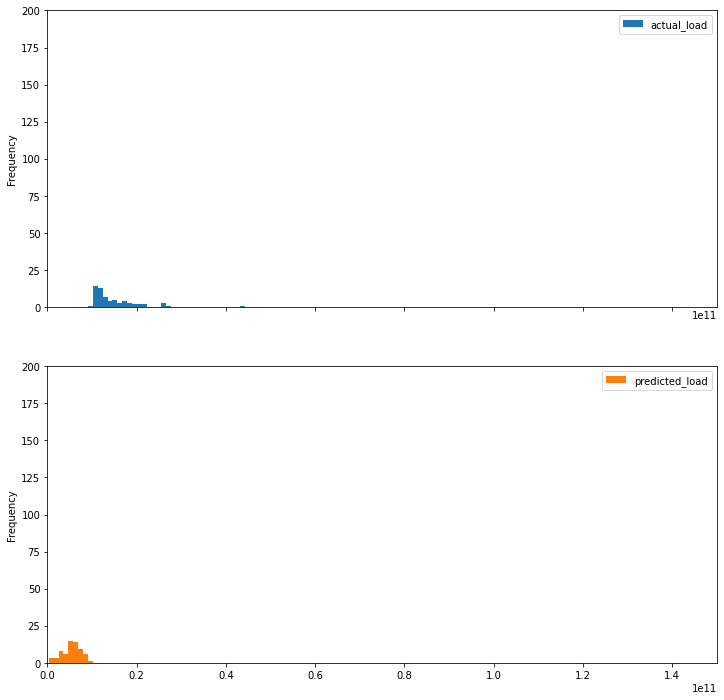

In [11]:
fli_df_high = fli_df[fli_df['actual_load'] >= HIGH_THRESHOLD].reset_index(drop=True)
axes = fli_df_high.drop(columns=drop_columns).plot.hist(bins=40, subplots=True, figsize=(12, 12))
for ax in axes:
    ax.set_ylim(0, 200)
    ax.set_xlim(0, 1.5e11)

### Distribution of Errors

array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

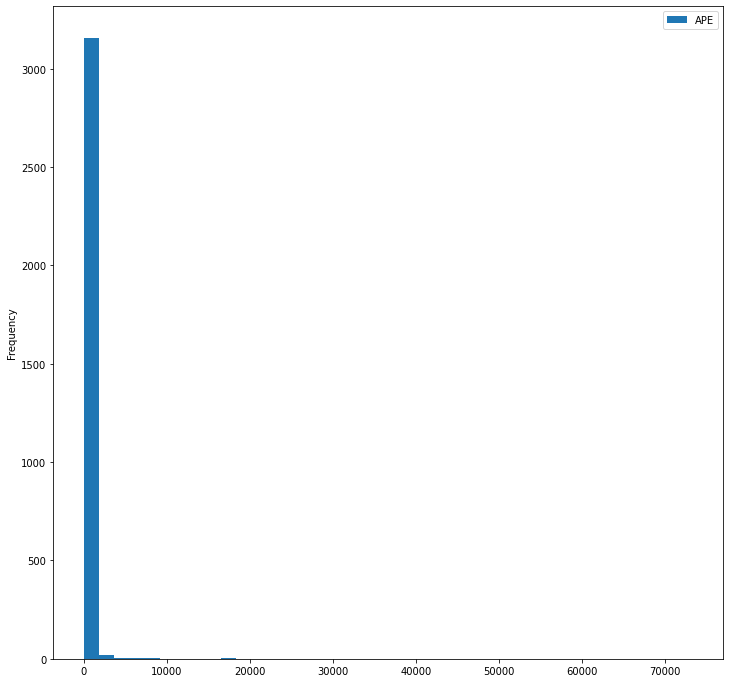

In [12]:
fli_err = fli_df.drop(columns=['lat', 'lon', 'predicted_load', 'actual_load'])
fli_err.plot.hist(bins=40, subplots=True, figsize=(12, 12))

### Error Stats

In [13]:
fli_err.max()

APE    73297.536275
dtype: float64

In [14]:
fli_err.mean()

APE    243.472886
dtype: float64

In [15]:
fli_err.median()

APE    67.257892
dtype: float64